<a href="https://colab.research.google.com/github/Amrithapavithran/The-Spark-Foundation-Internship/blob/main/_task_2_KMeans_Clustering_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author - Amritha Pavithran K
##Task- 2 Prediction Using Unsupervised ML

## K- Means Clustering

From the given 'iris' dataset, predict the optimum number of clusters and represent it visually.


K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data and the goal of this algorithm is to find groups in the data.

A **K-means clustering** algorithm tries to group similar items in the form of clusters. The number of groups is represented by K.

Let’s take an **example**. Suppose you went to a flower shop to buy some flower. There you will see different kinds of flower. The one thing you will notice there that the flower will be arranged in a group of their types. Like all the rose will be kept in one place, lilly will be kept with their kinds and so on. If you will notice here then you will find that they are forming a group or cluster, where each of the flower is kept within their kind of group forming the clusters.




In [35]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Load dataset: 
data = load_iris()
feature_names = data['feature_names']
features = data['data']
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
iris_df = pd.DataFrame(data.data, columns = data.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## How to Implementing K-Means Clustering ?



1.  Choose the number of clusters k
2.   Select k random points from the data as centroids
3.   Assign all the points to the closest cluster centroid
4.   Recompute the centroids of newly formed clusters
5.   Repeat steps 3 and 4

In [43]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(features)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

## Using the elbow method to determine the optimal number of clusters for k-means clustering
The optimum clusters are obtained from the graph, is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Text(0, 0.5, 'WCSS')

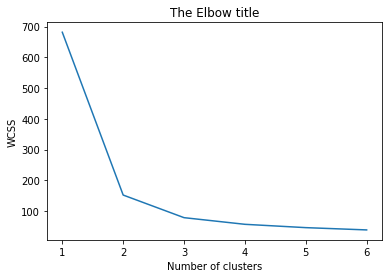

In [44]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [40]:
kmeans = KMeans(4)
identified_clusters = kmeans.fit_predict(features)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0], dtype=int32)

In [41]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

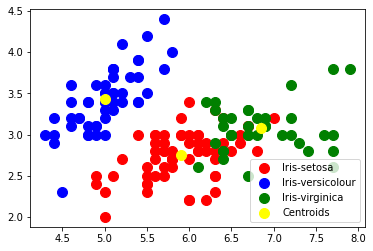

In [42]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

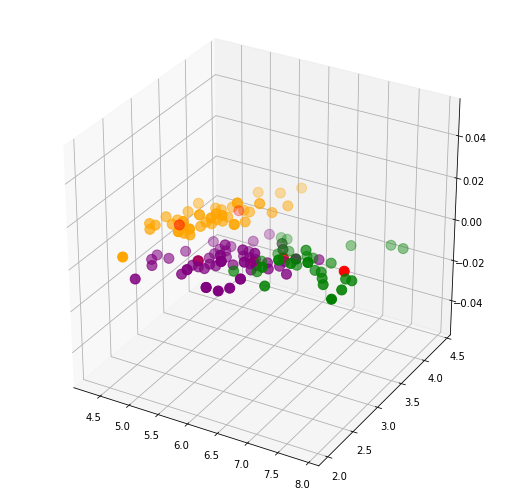

In [51]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()